# Amazon Health and Personal-Care Products Review-Sentiment Analysis

##### Problem statement
Health and personal care products are increasingly important and even vital for people’s health after the COVID-19 outbreak. What customers think about how effective these products in making us clean and healthy has not been investigated, however. In this project, my client is Amazon, and I will provide a software tool to Amazon in a way I will identify positive and negative words included in customers’ reviews for health and personal care products. For this purpose, I will use the customer reviews on these products in the period of 2004-2014. Based on these reviews in the said time period, I will develop a sentiment analysis model through natural language processing to determine customers’ sentiment toward these products. By developing such a model, I will provide my client, Amazon, better understanding of customers’ opinion and thoughts about its health and personal care products. **Thus, the central purpose of this project is to collect and analyze customer feedback about Amazon’s health and personal care products, and provide Amazon the detailed analyses of customer impressions on these products so that Amazon can benefit from these analyses in order to make improvements on its products and maximize e-commerce sales.**
###### Description of the Data
The data includes features in relation to customer reviews and ratings on health and personal care products. The data has 55,076 rows and 9 features. In each row, I have a customer review and the following variables:



* reviewerID : ID of the reviewer, type: object
* asin : ID of the product , type: object reviewerName : the reviewer’s 
* name – type: object helpful : s, how helpful the review is – type: 
* object reviewText : text of the review – type:
* object overall : Rating – type: float64
* summary : summary of the review – type: object
* unixReviewTime : time of the review (unix time) – type: int64
* reviewTime : time of the 
* review (raw) – type: object

The data is located in Standford Analysis Project webpage. The original data is in a JSON format. To analyze the data, I will have to change the data format. In order to do that, I will import a JSON file and decode JSON file by using query in order to convert JSON file to csv file.
Here’s the link for data Source: [link](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Health_and_Personal_Care_10.json.gz)


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Amazon-Health-and-Personal-Care-Products-Review-Sentiment-Analysis" data-toc-modified-id="Amazon-Health-and-Personal-Care-Products-Review-Sentiment-Analysis-1">Amazon Health and Personal-Care Products Review-Sentiment Analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-1.0.0.0.1">Problem statement</a></span><ul class="toc-item"><li><span><a href="#Description-of-the-Data" data-toc-modified-id="Description-of-the-Data-1.0.0.0.1.1">Description of the Data</a></span></li></ul></li></ul></li></ul></li></ul></li><li><span><a href="#Import-Necessary-Libraries" data-toc-modified-id="Import-Necessary-Libraries-1.1">Import Necessary Libraries</a></span></li><li><span><a href="#Load-the-Amazon-Review-Dataset" data-toc-modified-id="Load-the-Amazon-Review-Dataset-1.2">Load the Amazon Review Dataset</a></span></li><li><span><a href="#Check-Out-the-Dataset" data-toc-modified-id="Check-Out-the-Dataset-1.3">Check Out the Dataset</a></span></li><li><span><a href="#Heating-maps-for-missing-values" data-toc-modified-id="Heating-maps-for-missing-values-1.4">Heating maps for missing values</a></span></li><li><span><a href="#Some-information-about-dataset-so-far:" data-toc-modified-id="Some-information-about-dataset-so-far:-1.5"><strong>Some information about dataset so far:</strong></a></span></li><li><span><a href="#Dropping-Missing-Values" data-toc-modified-id="Dropping-Missing-Values-1.6">Dropping Missing Values</a></span></li><li><span><a href="#Concatenating-'reviewText'-and-'summary'-columns" data-toc-modified-id="Concatenating-'reviewText'-and-'summary'-columns-1.7">Concatenating 'reviewText' and 'summary' columns</a></span></li><li><span><a href="#Splitting-'helpful'-column-into-two-separate-columns" data-toc-modified-id="Splitting-'helpful'-column-into-two-separate-columns-1.8">Splitting 'helpful' column into two separate columns</a></span></li><li><span><a href="#Classifying-the-'overall'-(ratings)-as-good-,neutral-and-bad" data-toc-modified-id="Classifying-the-'overall'-(ratings)-as-good-,neutral-and-bad-1.9">Classifying the 'overall' (ratings) as good ,neutral and bad</a></span></li><li><span><a href="#Dropping-multiply-columns-about-customer-('reviwerName')-and-time-('unixReviewTime)" data-toc-modified-id="Dropping-multiply-columns-about-customer-('reviwerName')-and-time-('unixReviewTime)-1.10">Dropping multiply columns about customer ('reviwerName') and time ('unixReviewTime)</a></span></li><li><span><a href="#Organizing-'time'-column" data-toc-modified-id="Organizing-'time'-column-1.11">Organizing 'time' column</a></span></li><li><span><a href="#Creating-'year'-column-from--'reviewTime'-column" data-toc-modified-id="Creating-'year'-column-from--'reviewTime'-column-1.12">Creating 'year' column from  'reviewTime' column</a></span></li><li><span><a href="#Rename-column-names" data-toc-modified-id="Rename-column-names-1.13">Rename column names</a></span></li><li><span><a href="#Descriptive-Statistics" data-toc-modified-id="Descriptive-Statistics-1.14">Descriptive Statistics</a></span><ul class="toc-item"><li><span><a href="#Descriptive-Statistic-Summary:" data-toc-modified-id="Descriptive-Statistic-Summary:-1.14.1"><strong>Descriptive Statistic Summary:</strong></a></span></li></ul></li><li><span><a href="#Preprocessing-the-new_text" data-toc-modified-id="Preprocessing-the-new_text-1.15">Preprocessing the new_text</a></span><ul class="toc-item"><li><span><a href="#Removing-HTML-tags" data-toc-modified-id="Removing-HTML-tags-1.15.1">Removing HTML tags</a></span></li><li><span><a href="#Removing-accented-characters" data-toc-modified-id="Removing-accented-characters-1.15.2">Removing accented characters</a></span></li><li><span><a href="#Expanding-Contractions" data-toc-modified-id="Expanding-Contractions-1.15.3">Expanding Contractions</a></span></li><li><span><a href="#Removing-Special-Characters" data-toc-modified-id="Removing-Special-Characters-1.15.4">Removing Special Characters</a></span></li><li><span><a href="#Lemmatization" data-toc-modified-id="Lemmatization-1.15.5">Lemmatization</a></span></li><li><span><a href="#Removing-stopwords" data-toc-modified-id="Removing-stopwords-1.15.6">Removing stopwords</a></span></li><li><span><a href="#Building-a-Text-Normalizer" data-toc-modified-id="Building-a-Text-Normalizer-1.15.7">Building a Text Normalizer</a></span></li><li><span><a href="#Creating-'clean_text'-column-from--&quot;review_text&quot;-by-using--text-normalizer" data-toc-modified-id="Creating-'clean_text'-column-from--&quot;review_text&quot;-by-using--text-normalizer-1.15.8">Creating 'clean_text' column from  "review_text" by using  text normalizer</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Creating-'clues'-column-from-the-clean_text-by-using-tokenizer" data-toc-modified-id="Creating-'clues'-column-from-the-clean_text-by-using-tokenizer-1.15.8.0.1">Creating 'clues' column from the clean_text by using tokenizer</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Write-dataframe-to-CSV-file" data-toc-modified-id="Write-dataframe-to-CSV-file-1.16">Write dataframe to CSV file</a></span></li></ul></li></ul></div>

## Import Necessary Libraries

In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
import csv
import json
# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

## Load the Amazon Review Dataset

i got the dataset from [link](http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Health_and_Personal_Care_10.json.gz) and uploaded into Jupyter notebook through the following code.

In [2]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/Users/emineakbulut/Desktop/capstone project 2/data/reviews_Health_and_Personal_Care_10.json.gz')


## Check Out the Dataset

In [3]:
# Reading the file
df.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1N655X9X7C6QY,B00000J47L,"C. Cook ""LIVE..........LOVE........AND..........","[0, 0]",Right out of the box and ready to go !Everythi...,5.0,Out of the box ready to go................,1357948800,"01 12, 2013"
1,AEL6CQNQXONBX,B00000J47L,Cute Chihuahua,"[1, 1]",In this day and age it is hard to understand w...,5.0,SAVE LOTS OF MONEY AND THE ENVIRONMENT AT THE ...,1227571200,"11 25, 2008"
2,A2032LF6FWWK8E,B00000J47L,Jay Riemenschneider,"[6, 10]","At 2500ah, these rechargeable NiMh batteries p...",5.0,"Excellent power, quality NiMh batteries to go ...",1141689600,"03 7, 2006"


In [4]:
# Basic Statistics of the Dataset
df.describe()

,overall,unixReviewTime
count,55076.000000,5.507600e+04
mean,4.089858,1.351877e+09
std,1.025966,4.917115e+07
min,1.000000,1.073174e+09
25%,4.000000,1.324080e+09
50%,4.000000,1.365638e+09
75%,5.000000,1.388448e+09
max,5.000000,1.406074e+09


In [5]:
# Basic Information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55076 entries, 0 to 55075
Data columns (total 9 columns):
reviewerID        55076 non-null object
asin              55076 non-null object
reviewerName      54787 non-null object
helpful           55076 non-null object
reviewText        55076 non-null object
overall           55076 non-null float64
summary           55076 non-null object
unixReviewTime    55076 non-null int64
reviewTime        55076 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 4.2+ MB


In [6]:
# Shape of the dataset
df.shape

(55076, 9)

In [7]:
# Check out the data structure as DataFrame
df.sample(frac=1,random_state=1).T # or df.transpose()

,25130,51568,31692,14829,48343,33298,29297,48747,19678,16371,...,32912,21440,52047,7813,43723,50057,32511,5192,12172,33003
reviewerID,ABUE0ALHKWKHC,A22CT4ZGGD2FJF,A30TUN35ZE3NEU,A2YW1MG1GKU8XD,ABNMD6670TV53,A3NUUJF2S2ZWAD,A1LHAXBM5GBJS2,A3F9CMU8KNAY1M,A10M94ASQEBL56,A3091RP0SPZLMN,...,A2X2WTEVCZ5L8N,ACSX5AIZE3MJ9,ATS7LYGLUX34L,A1RRMZKOMZ2M7J,A2ALX5U55NTGTL,A2D3MU80ME36SV,A6X1O3A5C5FX1,AGVWTYW0ULXHT,A2Y8IDC1FKGNJC,A14R9XMZVJ6INB
asin,B004VK5ON8,B00HFQQ0VU,B007DKXR64,B002GU66BY,B00EZ8PR1U,B007VAGXDK,B0061JPJH8,B00FSCB3PG,B003MP16A8,B0030HO4KM,...,B007RWFSII,B003XN4RIC,B00HKH0I12,B0017OAH8I,B00CDKTE48,B00GM029TC,B007LEO4Y6,B0013OQGO6,B001N0LJ8I,B007S50LLI
reviewerName,Kiwi,"S. Chang ""Steven Chang""",Enamelation !,SweetPea,"R. Kolin ""Third Degree member since 1991""","David Jones ""fly fisher""",Scooter McGavin,"Susan ""minniesm""","D. Berdanis ""endymion9""",BB,...,Sandy Kay,Values Privacy,Daniel V. Reilly,Susan Katz,"Danny Boy ""Danny Boy""","david l. poremba ""the past in review""",SMB,"Nathan Andersen ""Gadget lover and author of S...",L. A.,amf0001
helpful,"[0, 0]","[1, 1]","[0, 1]","[0, 0]","[2, 3]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",...,"[0, 0]","[0, 0]","[0, 0]","[1, 1]","[0, 0]","[0, 1]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
reviewText,I walk my dogs in all sorts of weather so I ne...,My wife and I have been using Waterpiks for ye...,I didn't fall asleep after some black tea and ...,"I really wanted to like these bars, I used the...",I've been using Oral-B's for many years simply...,The Air Wick scent system is very effective an...,"Deodorant has always had some weird names, but...",For a few years now I have only used foam dish...,This product makes a good work snack when I do...,I compared these to the Tum brand of Assorted ...,...,"When I was a child, my mother believed in cod ...",The brightness I use to read before bed is the...,I was a little wary of going back to powdered ...,I have difficulty sleeping through the night. ...,This is probably the most complete kit for cle...,This product hooks on the toilet fairly easily...,"Disclaimer: Reviewing supplements is hard, sin...",B-12 is good for your nerve tissue and brain c...,This is a handy little stick that helps preven...,"Frankly, these taste like candy. It's like al..."
overall,4,4,2,2,4,5,4,4,3,4,...,1,3,5,5,5,3,4,4,4,4
summary,Pretty close but not completely fragrance free...,Compared to the previous model.,not for me,Not for me,Great toothbrush with gimmick to boot!,Very Pleasant Scent,"Works Great, Strong Scent",Grease cutter,Good for work snacks,Very Fruity,...,Horrible fishy taste. Yuck!,Not ideal,Love it!,It works!,It's a great kit,doesn't clean much,Good supplement,An easy way to get B-12 - tastes good and chew...,Band Aid Friction Block,"Very sweet, and it works"
unixReviewTime,1308614400,1392854400,1368748800,1361923200,1383091200,1359763200,1359849600,1390521600,1371081600,1385078400,...,1397606400,1405123200,1400025600,1385078400,1374105600,1393804800,1363737600,1360454400,1289606400,1381968000
reviewTime,"06 21, 2011","02 20, 2014","05 17, 2013","02 27, 2013","10 30, 2013","02 2, 2013","02 3, 2013","01 24, 2014","06 13, 2013","11 22, 2013",...,"04 16, 2014","07 12, 2014","05 14, 2014","11 22, 2013","07 18, 2013","03 3, 2014","03 20, 2013","02 10, 2013","11 13, 2010","10 17, 2013"


In [8]:
# Check out sample 'reviewText'
print(df['reviewText'][1])

In this day and age it is hard to understand why everyone isn't using rechargable batteries.  I own about 6 packs of these batteries.  They are wonderful.  I bet I have saved hundreds of dollars so far and keep saving.  Why pay $4.00 to $5.00 for one pack of batteries that get used once and thrown away when you can purchase these and reuse them 1000 times.  I absolutely refuse to by disposable batteries for the most part.  It is true that they don't quite have the power of normal energizer alkaline batteries so they might be an issue for certain things that use a lot of power.  For example Digital Camera's take a lot of power.  But for the most part these work really well and I have used them for 3 - 4 years now.  I highly recommend them to everyone.


In [9]:
# Check out sample 'summary'
print(df['summary'][1])

SAVE LOTS OF MONEY AND THE ENVIRONMENT AT THE SAME TIME


<div class="span7 alert alert-success">
    
**Each row corresponds to a customers' review information and related variables are explained below:**

reviewerID : ID of the reviewer

asin : ID of the product 

reviewerName : name of the reviewer 

helpful : helpfulness of the review, e.g. 3/4

reviewText : text of the review 

overall : rating 

summary : summary of the review 

unixReviewTime : time of the review (unix time) 

reviewTime : time of the review (raw)
</div> 

In [10]:
# Checking abnormality on dataset
df.overall[df['overall']<1].sum()

0.0

In [11]:
# Checking abnormality on dataset
df.overall[df['overall']>5].sum()

0.0

>There isn't rating out of defined 1-5 range on 'overall'.  Let's see how many customers give ratings for each category.

In [12]:
# Customer totals for each rating
df.overall.value_counts()

5.0    24050
4.0    18064
3.0     8317
2.0     3151
1.0     1494
Name: overall, dtype: int64

## Heating maps for missing values

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text xticklabel objects>)

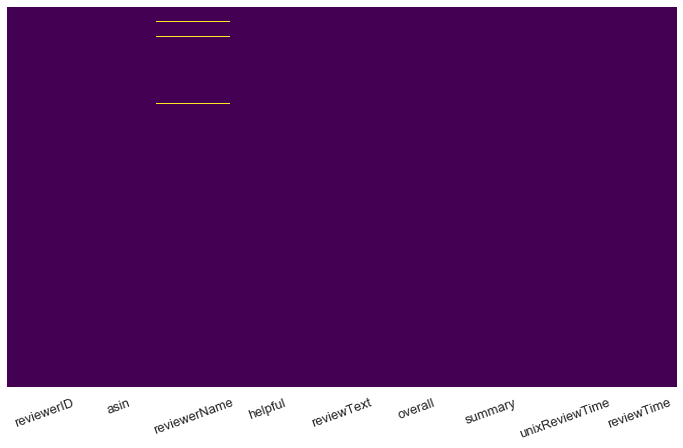

In [13]:
#checking missing value through heatmap
plt.figure(figsize=(12,7))
sns.set()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.xticks(fontsize=13,rotation=20)

In [14]:
# # Check for missing values
df.isnull().sum()

reviewerID          0
asin                0
reviewerName      289
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

## **Some information about dataset so far:**

This data includes 55076 rows(observations) and 9 columns(feature variables). 

Memory usage is 4.2+ MB. 

In the dataset, we have 7 object, 1 float64 and 1 int64 data types. 

289 'reviewerName' information is missing in the dataset. Since customer don't give their name, we should be suspicious about their reviews and ratings. I would prefer to drop the missing values from dataset  since we have enough observations to conclude a decision for sentiment analysis. 

We should concatenate 'reviewText' and 'summary' since both of them gives information about product, and also drop both 'reviewText' and 'summary' column at the end. 

'helpful' variable includes positive (thumbs up)  and negative (thumbs down) feedback for reviews' information, it will be splitted into two columns: positive feedback will be represented as "pos_feedback" , and negative feedback will be represented as "neg_feedback". Also, 'helpful' variable will be represented as an int64 type in the dataset via that step.

We should classify the 'overall' (ratings) as good, neutral and bad in order to make sentiment analysis. 

In the dataset, 'reviewerID' and 'reviwerName' are both for identification of customer. We should drop one of them from the dataset. Preferably, I will drop 'reviewerName' since customer names are not standardized and there are lots of different sytle to represent them.

'unixReviewTime' will be dropped since it has already been represented in 'reviewTime' feature in a more understandable format. Also, 'reviewTime' will be converted to datetime data type. 

We will rename the columns in order to improve practicality and the readibility of coding as stated below: 

- reviewerID : "customer"

- asin : "product"

- reviewerName : column will be dropped.

- helpful : positive feedback will be represented as "pos_feedback" , neutral feedback will be represented as "neut_feedback" and negative feedback will be represented as "neg_feedback".

- reviewText : This will be concatenated with "summary" and renamed as "review_text"

- overall : "rating" 

- summary : it will be dropped after it is concatenated with "reviewerText".

- unixReviewTime : column will be dropped. 

- reviewTime : "time"

Now, we will practice all defined action items above. 

## Dropping Missing Values

In [15]:
# Drop missing customers who don't give their names
df1=df.dropna(axis=0)

In [16]:
# Customer totals for each rating (after drop missing values)
df1.overall.value_counts()

5.0    23922
4.0    17957
3.0     8283
2.0     3139
1.0     1486
Name: overall, dtype: int64

## Concatenating 'reviewText' and 'summary' columns

In [17]:
df1['review_text']=df1.reviewText.str.cat(df1.summary,sep=' ')
df1=df1.drop(['summary','reviewText'],axis=1)
df1.head(3)

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,review_text
0,A1N655X9X7C6QY,B00000J47L,"C. Cook ""LIVE..........LOVE........AND..........","[0, 0]",5.0,1357948800,"01 12, 2013",Right out of the box and ready to go !Everythi...
1,AEL6CQNQXONBX,B00000J47L,Cute Chihuahua,"[1, 1]",5.0,1227571200,"11 25, 2008",In this day and age it is hard to understand w...
2,A2032LF6FWWK8E,B00000J47L,Jay Riemenschneider,"[6, 10]",5.0,1141689600,"03 7, 2006","At 2500ah, these rechargeable NiMh batteries p..."


## Splitting 'helpful' column into two separate columns

In [18]:
# Splitting 'helpful column' into 'neg_feedback' and 'pos_feedback' and drop it at the end
list_pos = [help[0] for help in df1['helpful']]
list_neg = [help[1]-help[0] for help in df1['helpful']]

# Positive Feedback (Supporting reviewer's idea and find it useful)
df1['pos_feedback']=list_pos

# Negative Feedback (Finding reviewer's idea useless and not supporting it)
df1['neg_feedback']=list_neg

# Drop unnecessary 'helpful' column
df1=df1.drop('helpful',axis=1)
df1.head(3)


,reviewerID,asin,reviewerName,overall,unixReviewTime,reviewTime,review_text,pos_feedback,neg_feedback
0,A1N655X9X7C6QY,B00000J47L,"C. Cook ""LIVE..........LOVE........AND..........",5.0,1357948800,"01 12, 2013",Right out of the box and ready to go !Everythi...,0,0
1,AEL6CQNQXONBX,B00000J47L,Cute Chihuahua,5.0,1227571200,"11 25, 2008",In this day and age it is hard to understand w...,1,0
2,A2032LF6FWWK8E,B00000J47L,Jay Riemenschneider,5.0,1141689600,"03 7, 2006","At 2500ah, these rechargeable NiMh batteries p...",6,4


## Classifying the 'overall' (ratings) as good ,neutral and bad

In [19]:
# Classifying ratings as good ,neutral and bad
good_rate    = len (df1 [df1['overall'] > 3])
neutral_rate = len (df1 [df1['overall'] == 3])
bad_rate     = len (df1 [df1['overall'] < 3])

# Printing rates and their total numbers

print ( 'Good ratings    : {} reviwes for health and personal care products.'.format(good_rate))
print ( 'Neutral ratings :  {} reviwes for health and personal care products.'.format(neutral_rate))
print ( 'Bad ratings     :  {} reviwes for health and personal care products.'.format(bad_rate))


Good ratings    : 41879 reviwes for health and personal care products.
Neutral ratings :  8283 reviwes for health and personal care products.
Bad ratings     :  4625 reviwes for health and personal care products.


In [20]:
# Applying the new classification to the ratinga column

list_rate_class=[]

for x in df1['overall']:
    
    if x < 3 :
        list_rate_class.append('bad')
        
    elif x==3 :
        list_rate_class.append('neutral')
        
    else :
        list_rate_class.append('good')


df1['rating_class'] = list_rate_class



# Drop unnecessary column overall
df1=df1
df1.head(3)

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviewTime,review_text,pos_feedback,neg_feedback,rating_class
0,A1N655X9X7C6QY,B00000J47L,"C. Cook ""LIVE..........LOVE........AND..........",5.0,1357948800,"01 12, 2013",Right out of the box and ready to go !Everythi...,0,0,good
1,AEL6CQNQXONBX,B00000J47L,Cute Chihuahua,5.0,1227571200,"11 25, 2008",In this day and age it is hard to understand w...,1,0,good
2,A2032LF6FWWK8E,B00000J47L,Jay Riemenschneider,5.0,1141689600,"03 7, 2006","At 2500ah, these rechargeable NiMh batteries p...",6,4,good


<font color=green> **After applying the new classification, I have a new column named as 'rating_class' consists of three classes which are 'good, neutral and bad'.** </font>

## Dropping multiply columns about customer ('reviwerName') and time ('unixReviewTime)

In [21]:
# Drop 'reviewName' and ' unixReviewTime' columns
df1=df1.drop(['reviewerName','unixReviewTime'],axis=1)
df1.head(3)

,reviewerID,asin,overall,reviewTime,review_text,pos_feedback,neg_feedback,rating_class
0,A1N655X9X7C6QY,B00000J47L,5.0,"01 12, 2013",Right out of the box and ready to go !Everythi...,0,0,good
1,AEL6CQNQXONBX,B00000J47L,5.0,"11 25, 2008",In this day and age it is hard to understand w...,1,0,good
2,A2032LF6FWWK8E,B00000J47L,5.0,"03 7, 2006","At 2500ah, these rechargeable NiMh batteries p...",6,4,good


## Organizing 'time' column

In [22]:
# Convert time object to datetime and create a new column named 'time'
df1['time'] = df1['reviewTime'].str.replace(',',"")
df1['time'] = pd.to_datetime(df1['time'],format = '%m %d %Y')

# Drop unnecessary 'reviewTime' column
df1 = df1.drop('reviewTime',axis=1)
df1.head(3)



,reviewerID,asin,overall,review_text,pos_feedback,neg_feedback,rating_class,time
0,A1N655X9X7C6QY,B00000J47L,5.0,Right out of the box and ready to go !Everythi...,0,0,good,2013-01-12
1,AEL6CQNQXONBX,B00000J47L,5.0,In this day and age it is hard to understand w...,1,0,good,2008-11-25
2,A2032LF6FWWK8E,B00000J47L,5.0,"At 2500ah, these rechargeable NiMh batteries p...",6,4,good,2006-03-07


In [23]:
# Check the 'time' data type with a sample observation
type(df1['time'][110])

pandas._libs.tslibs.timestamps.Timestamp

## Creating 'year' column from  'reviewTime' column

In [24]:
# Arrange 'year' column from 'time 'column

#df1['year']=pd.to_datetime(df1['time']).dt.year

df1['year']=df1['time'].dt.year
df1.head(3)

,reviewerID,asin,overall,review_text,pos_feedback,neg_feedback,rating_class,time,year
0,A1N655X9X7C6QY,B00000J47L,5.0,Right out of the box and ready to go !Everythi...,0,0,good,2013-01-12,2013
1,AEL6CQNQXONBX,B00000J47L,5.0,In this day and age it is hard to understand w...,1,0,good,2008-11-25,2008
2,A2032LF6FWWK8E,B00000J47L,5.0,"At 2500ah, these rechargeable NiMh batteries p...",6,4,good,2006-03-07,2006


In [25]:
df1['year'].unique()


array([2013, 2008, 2006, 2009, 2010, 2012, 2011, 2007, 2014, 2004, 2005])

## Rename column names

In [26]:
# Rename the columns
df1.columns = ['customer', 'product', 'rating', 'review_text', 'pos_feedback', 'neg_feedback', 'rating_class', 'time','year']

# Sample observation
df1.tail(1)

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time,year
55075,A2I8KUDXTC9WYI,B00LJBMCKK,5.0,I started using this product because it was re...,1,0,good,2014-07-17,2014


## Descriptive Statistics 

In [27]:
# Read statistic summary of numeric variables
df1.describe()

,rating,pos_feedback,neg_feedback,year
count,54787.000000,54787.000000,54787.000000,54787.000000
mean,4.089492,2.147754,0.524705,2012.370635
std,1.026216,25.584276,2.131750,1.620425
min,1.000000,0.000000,0.000000,2004.000000
25%,4.000000,0.000000,0.000000,2011.000000
50%,4.000000,0.000000,0.000000,2013.000000
75%,5.000000,1.000000,1.000000,2014.000000
max,5.000000,1950.000000,181.000000,2014.000000


In [28]:
# Costumer totals for each rating
df1.rating.value_counts()

5.0    23922
4.0    17957
3.0     8283
2.0     3139
1.0     1486
Name: rating, dtype: int64

In [29]:
# Costumer totals for each rating class
df1.rating_class.value_counts()

good       41879
neutral     8283
bad         4625
Name: rating_class, dtype: int64

In [30]:
# Print the number of positive feedback
pos = len (df1[df1['pos_feedback']>0])
print('Number of positive feedbacks  : {}'.format(pos))
print('')

# Print the number of negative feedback
neg = len (df1[df1['neg_feedback']>0])
print('Number of negative feedback   : {}'.format(neg))

# Print the number of no 'helpful' feedback
no_helpful = len(df1) - (pos+neg)
print('\nNumber of no helpful feedbacks: {}'.format(no_helpful))








Number of positive feedbacks  : 19891

Number of negative feedback   : 14807

Number of no helpful feedbacks: 20089


In [31]:
# Statistic of non-numeric variables

# Number of unique costumers
print('Number of unique customers : {}'.format( len(df1['customer'].unique())))
print('')

# Number of unique products
print('Number of unique products  : {}'.format( len(df1['product'].unique())))
print('')

# Review number per unique customer
print('Review number per unique customer : {}'.format( len(df1)/len(df1['customer'].unique())))
print('')

# Review number per unique product
print('Review number per unique product  : {}'.format( len(df1)/len(df1['product'].unique())))
print('')


Number of unique customers : 2184

Number of unique products  : 1260

Review number per unique customer : 25.08562271062271

Review number per unique product  : 43.481746031746034



### **Descriptive Statistic Summary:**

**- Rating Status:**

54787 customer gives ratings and mean of the ratings is 4.08, which means that customers prefer to give high ratings for products. Standard deviation and percentiles also show that 1 and 2 ratings for products are rare. To be able to predict the ratings reasonably, we classified them as 'good', 'neutral', and 'bad' above. 

According to the statistics on rating stars:

1486 customers give 1 star 

3139 customers give 2 stars

8283 customers give 3 stars

17957  customers give 4 stars

23922 customers give 5 stars


On the other hand, if we look for the rating class, the picture is look like below.

4625 customers give bad ratings

8283 customers give neutral ratings

41879 customers give good ratings

**- Feedback Status**

19891 customers find the given reviews logical and totally agree with them. They give positive feedbacks. The mean 2.14 and standard deviation is 25.5 whereas the highest positive feedback number for reviews is 1950.. That shows we may have some outliers in the dataset. 

14807 customers find the given reviews useless and don't aggree with the them. They give negative feedbacks. The mean 0.52 and standard deviation is 2.13 whereas the highest negative feedback number for reviews is 181.

On the other hand 20089 customers don't give either positive or negative feedbacks for reviews. 

**- Non-numeric variables statistics:**

We have 2184 unique customers and 1260 products in this dataset. Each customers averagely give 25 reviews for products and on the other hand, there is averagely 43 reviews for each product in the website. 

On exploratory data analysis, we will check if there is a case for outliers by visualizing data. 

## Preprocessing the new_text

In [32]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import CONTRACTION_MAP
import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en', parse=True, tag=True, entity=True)

### Removing HTML tags

I will write a function to remove the HTML tags which typically does not add much value towards understanding and analyzing text.

In [33]:
def strip_html_tags(text) :
    
    'Removes html tags in the text'
    
    soup = BeautifulSoup(text, 'html.parser')
    stripped_text = soup.get_text()
    return stripped_text
    

### Removing accented characters

I will write a function to remove and standardize accented characters/letters into ASCII characters.

In [34]:
def remove_accented_chars(text):
    
    'Removes and standardize accented characters/letters'
    
    text = unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')
    
    return text


### Expanding Contractions
I will write a function to convert each contraction to its expanded, orginal form in order to help with text standardization.

In [35]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

### Removing Special Characters
I will use simple regular expressions(regexes) to remove special characters and symbols which are usually non-alphanumeric characters or even occasional numeric characters.

In [36]:
def remove_special_characters(text, remove_digits=False):
    
    "Remove special characters/symbols"
    
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

### Lemmatization
I will remove word affixes to get to the base form of a word, known as root word.

In [37]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text


### Removing stopwords
I will write a function to remove stopwords which have little or no significance in the text.

In [38]:
# Instantiate Tokenizer
tokenizer = ToktokTokenizer()

# Create stopword list
stopword_list = nltk.corpus.stopwords.words('english')

# 'no' and 'not' may give us information so those are removed from stop list
stopword_list.remove('no')
stopword_list.remove('not')

In [39]:
def remove_stopwords(text, is_lower_case=False):
    
    "Remove stopwords in the text except 'no' and 'not'"
    
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

### Building a Text Normalizer
Based on the functions which we have written above and also with additional text correction techniques, we will build a text normalizer in order to help us to preproces the new_text document.

In [40]:
def normalize_corpus(doc, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
     
    # strip HTML
    if html_stripping:
        doc = strip_html_tags(doc)
            
    # remove accented characters
    if accented_char_removal:
        doc = remove_accented_chars(doc)
            
    # expand contractions    
    if contraction_expansion:
        doc = expand_contractions(doc)
            
    # lowercase the text    
    if text_lower_case:
        doc = doc.lower()
            
    # remove extra newlines
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        
    # lemmatize text
    if text_lemmatization:
        doc = lemmatize_text(doc)
            
    # remove special characters and\or digits    
    if special_char_removal:
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        doc = remove_special_characters(doc, remove_digits=remove_digits)  
            
    # remove extra whitespace
    doc = re.sub(' +', ' ', doc)
        
    # remove ' (apostrophe) sign
    doc = re.sub(r"'", r'', doc)
        
    # remove stopwords
    if stopword_removal:
        doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        
    return doc

### Creating 'clean_text' column from  "review_text" by using  text normalizer 

In [41]:
# Create a new column for cleaned text 
df1['clean_text'] = list(map(lambda doc: normalize_corpus(doc),df1['review_text']))


##### Creating 'clues' column from the clean_text by using tokenizer 

In [42]:
# create a new column named as clues  from 'clean_text' by applying tokenizer
tokenizer = RegexpTokenizer(r'\w+')
df1["clues"] = df1["clean_text"].apply(tokenizer.tokenize)
df1.head(1)

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time,year,clean_text,clues
0,A1N655X9X7C6QY,B00000J47L,5.0,Right out of the box and ready to go !Everythi...,0,0,good,2013-01-12,2013,right box ready go everything star packaging p...,"[right, box, ready, go, everything, star, pack..."


In [43]:
# Tokens status
all_words = [word for tokens in df1["clues"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df1["clues"]]
vocabulary = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(vocabulary)))
print("Max review length is (word based) %s" % max(sentence_lengths))
print("Min review length is (word based) %s" % min(sentence_lengths))

4572979 words total, with a vocabulary size of 53506
Max review length is (word based) 2760
Max review length is (word based) 2


## Write dataframe to CSV file

In [44]:
df1.to_csv('/Users/emineakbulut/Desktop/capstone project 2/data/cleaned_review_health_and_personal_care.csv', sep = ',', encoding = 'utf-8', index = False)